In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
import numpy as np
import json
from IPython.display import HTML

In [2]:
@plt.FuncFormatter
def fake_dates(x, pos):
    """ Custom formater to turn floats into e.g., 2016-05-08"""
    return dates.num2date(x).strftime('%Y-%m-%d')

# Withings data

In [3]:
df = pd.read_csv('data/aggregates_steps.csv', parse_dates=[0])

In [4]:
print(df.shape)
df.head()

(839, 2)


,date,value
0,2018-09-30,6824
1,2018-09-29,8014
2,2018-09-28,10988
3,2018-09-27,11996
4,2018-09-26,7273


In [15]:
df['datenum'] = dates.datestr2num(df['date'].dt.strftime("%Y-%m-%d")) #pd.to_numeric(df.date)

In [31]:
df = df[df['value'] != 0]

# Google Fit

In [100]:
df_fit = pd.read_csv("data/Fit/Daily Aggregations/Daily Summaries.csv")

In [148]:
df_mix = df_fit.merge(df.assign(Date=df['date'].dt.strftime("%Y-%m-%d")), on='Date', how='outer')

In [158]:
df_mix['Steps'] = df_mix[['value', 'Step count']].mean(axis=1)

In [286]:
df_mix.dropna(axis=0, subset=['Steps'], inplace=True)

In [163]:
df_mix['datenum'] = dates.datestr2num(df_mix['Date']) #pd.to_numeric(df.date)

/home/arch/.virtualenvs/jupyterlab/lib/python3.7/site-packages/seaborn/regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


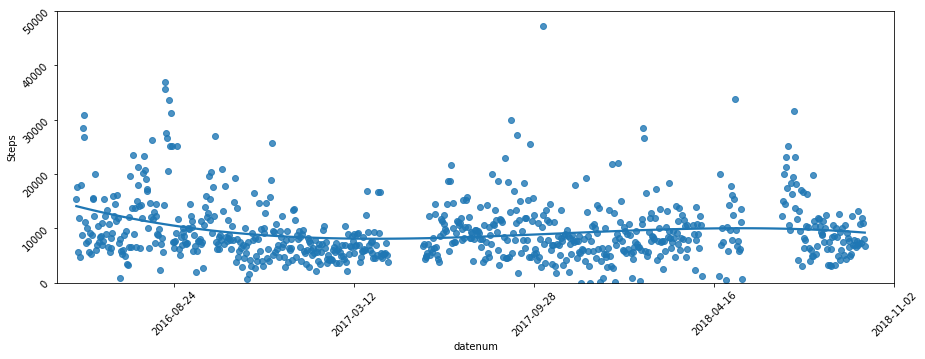

In [289]:
plt.figure(figsize=(15,5))
#fig, ax = plt.subplots()
ax = sns.regplot(x="datenum", y="Steps", data=df_mix, order=4, ci=None, truncate=True)# x_estimator=np.mean, logx=True, truncate=True)

# xlim
ax.set_ylim(0, 50000)
ax.set_xlim(736070, 737000)

# here's the magic:
ax.xaxis.set_major_formatter(fake_dates)

# legible labels
ax.tick_params(labelrotation=45)

In [214]:
df_mix['date'] = pd.to_datetime(df_mix['Date'], format='%Y-%m-%d')

/home/arch/.virtualenvs/jupyterlab/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


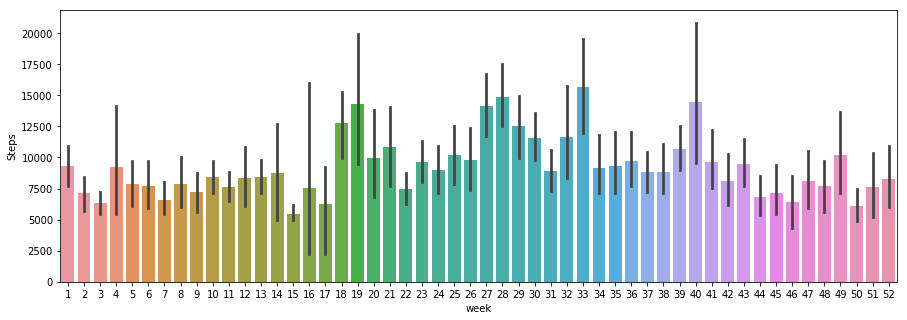

In [290]:
plt.figure(figsize=(15,5))
#months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ax = sns.barplot(x="week", y="Steps", data=df_mix.assign(week = df_mix['date'].dt.week))
#_ = ax.set_xticklabels(months)

/home/arch/.virtualenvs/jupyterlab/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


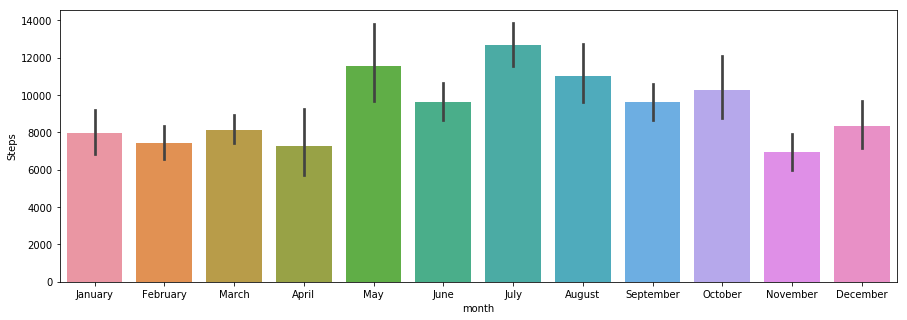

In [291]:
plt.figure(figsize=(15,5))
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ax = sns.barplot(x="month", y="Steps", data=df_mix.assign(month = df_mix['date'].dt.month))
_ = ax.set_xticklabels(months)

/home/arch/.virtualenvs/jupyterlab/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


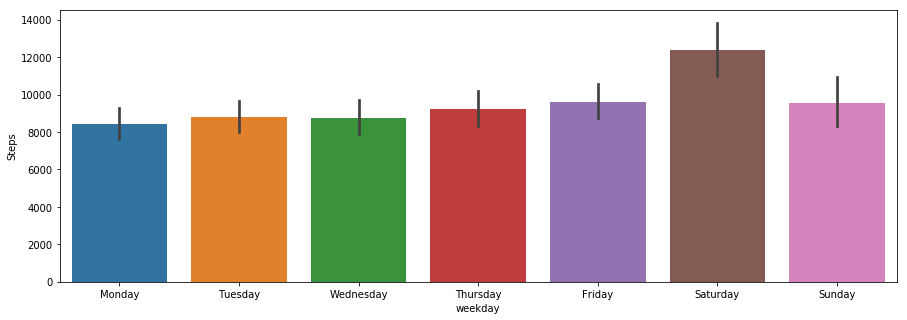

In [220]:
plt.figure(figsize=(15,5))
weekday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = sns.barplot(x="weekday", y="Steps", data=df_mix.assign(weekday = df_mix['date'].dt.dayofweek))
_ = ax.set_xticklabels(weekday)

/home/arch/.virtualenvs/jupyterlab/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


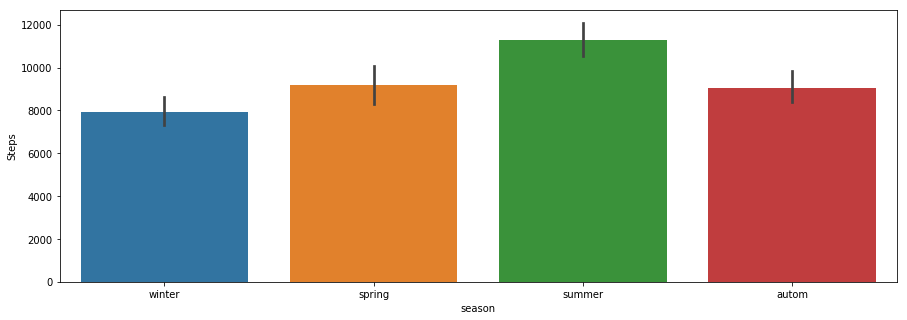

In [231]:
plt.figure(figsize=(15,5))
seasons = ["winter", "spring", "summer", "autom"]
ax = sns.barplot(x="season", y="Steps", data=df_mix.assign(season = (df_mix['date'].dt.month%12 + 3)//3))
_ = ax.set_xticklabels(seasons)

/home/arch/.virtualenvs/jupyterlab/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


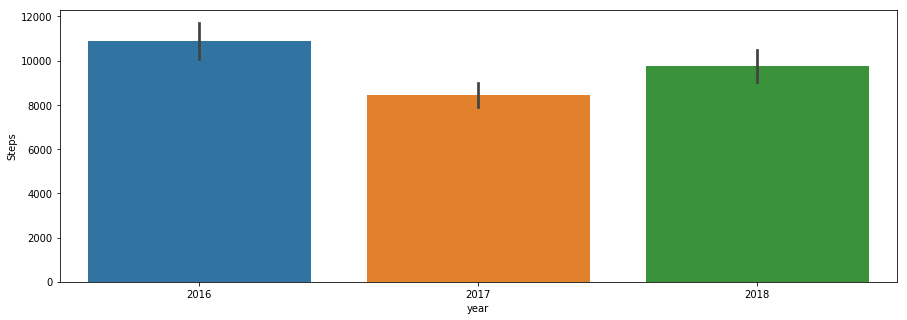

In [237]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x="year", y="Steps", data=df_mix.assign(year =df_mix['date'].dt.year))

# Daily steps calendar heatmap

In [239]:
df_steps = pd.concat([df_mix['date'].dt.strftime("%s"), df_mix['Steps']], axis=1)

In [292]:
dic_steps = dict()
for k,x in df_steps.iterrows():
    dic_steps[x['date']] = x['Steps']

In [293]:
html_code ="""
<script type="text/javascript" src="//d3js.org/d3.v3.min.js"></script>
<script type="text/javascript" src="//cdn.jsdelivr.net/cal-heatmap/3.3.10/cal-heatmap.min.js"></script>
<link rel="stylesheet" href="//cdn.jsdelivr.net/cal-heatmap/3.3.10/cal-heatmap.css" />
<div id="cal-heatmap"></div>
<button id="example-c-PreviousDomain-selector" style="margin-bottom: 10px;" class="btn"><i class="icon icon-chevron-left"></i></button>
<button id="example-c-NextDomain-selector" style="margin-bottom: 10px;" class="btn"><i class="icon icon-chevron-right"></i></button>
<script type="text/javascript">
    var cal = new CalHeatMap();
    cal.init({
        start: new Date(2016, 3, 1, 1), // January, 1st 2000
        range: 12,
        domain: "month",
        subDomain: "day",
        nextSelector: "#example-c-NextDomain-selector",
        previousSelector: "#example-c-PreviousDomain-selector",
        data: %s,
        legend: [3000, 7000, 10000, 15000, 20000],
        legendColors: ["#ecf5e2", "#232181"]
    });
</script>""" % dic_steps

In [294]:
HTML(html_code)

# Steps per day scatter plot

In [295]:
list_steps = []
for k,x in df_mix.iterrows():
    list_steps.append({'x': x['date'].strftime("%Y-%m-%d"), 'y': x['Steps']})

## Mean steps

In [296]:
x=df_mix['date'].dt.strftime("%s").astype('int').values
y=df_mix['Steps'].values
num_samples = 100
p, cov = np.polyfit(x, y, 3, cov=True)
z = np.poly1d(p)

xi = np.linspace(np.min(x), np.max(x), num_samples)
yi = z(xi)

In [298]:
list_mean_steps = []
list_upper_steps = []
list_lower_steps = []
for i in range(num_samples):
    list_mean_steps.append({'x': pd.to_datetime(xi, unit='s', errors='ignore')[i].strftime("%Y-%m-%d"), 'y': np.round(yi[i])})
    list_upper_steps.append({'x': pd.to_datetime(xi, unit='s', errors='ignore')[i].strftime("%Y-%m-%d"), 'y': np.round(yi[i]+np.percentile(df_mix['Steps'],2.5))})
    list_lower_steps.append({'x': pd.to_datetime(xi, unit='s', errors='ignore')[i].strftime("%Y-%m-%d"), 'y': np.round(yi[i]-np.percentile(df_mix['Steps'],2.5))})

# Export to csv

In [301]:
with open('output/withings_steps.json', 'w') as outfile:
    json.dump({'steps_mean_low': list_lower_steps,
               'steps_mean_high': list_upper_steps,
               'steps_mean': list_mean_steps,
               'steps_points': list_steps,
               'steps_heatmap': dic_steps,
               'steps_month': { 'index': months, 'values': [x[0] for x in df_mix.groupby(df_mix['date'].dt.month).agg({'Steps':np.mean}).round(1).values ] },
               'steps_weekday': { 'index': weekday, 'values': [x[0] for x in df_mix.groupby(df_mix['date'].dt.dayofweek).agg({'Steps':np.mean}).round(1).values] }
              }, outfile, indent=1)